In [13]:
pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Define the Encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2_mean = nn.Linear(hidden_dim, latent_dim)
        self.fc2_logvar = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        h = torch.relu(self.fc1(x))
        mean = self.fc2_mean(h)
        logvar = self.fc2_logvar(h)
        return mean, logvar

# Define the Decoder
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        h = torch.relu(self.fc1(z))
        x_reconstructed = torch.sigmoid(self.fc2(h))  # Output should be between 0 and 1
        return x_reconstructed

# Define the VAE
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, logvar

# Define the loss function
def loss_function(x_reconstructed, x, mu, logvar):
    BCE = nn.BCELoss(reduction='sum')(x_reconstructed, x)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training the VAE
def train_vae(model, dataloader, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        train_loss = 0
        for batch in dataloader:
            data = batch[0]
            optimizer.zero_grad()
            x_reconstructed, mu, logvar = model(data)
            loss = loss_function(x_reconstructed, data, mu, logvar)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        print(f'Epoch {epoch + 1}, Loss: {train_loss / len(dataloader.dataset)}')

# Example usage
input_dim = 784  # For MNIST
hidden_dim = 400
latent_dim = 20

model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Create dummy data for demonstration
data = torch.rand(1000, input_dim)  # Random data in range [0, 1]
dataloader = DataLoader(TensorDataset(data), batch_size=64, shuffle=True)

train_vae(model, dataloader, optimizer)


Epoch 1, Loss: 547.100482421875
Epoch 2, Loss: 545.5984140625
Epoch 3, Loss: 545.00408203125
Epoch 4, Loss: 544.828234375
Epoch 5, Loss: 544.729390625
Epoch 6, Loss: 544.5841953125
Epoch 7, Loss: 544.53317578125
Epoch 8, Loss: 544.5194765625
Epoch 9, Loss: 544.42970703125
Epoch 10, Loss: 544.331888671875


Epoch 1, Average Loss: 34187.1553
Epoch 2, Average Loss: 34106.0486
Epoch 3, Average Loss: 34070.5151
Epoch 4, Average Loss: 34051.4464
Epoch 5, Average Loss: 34041.7240
Epoch 6, Average Loss: 34036.1212
Epoch 7, Average Loss: 34034.6064
Epoch 8, Average Loss: 34030.5300
Epoch 9, Average Loss: 34025.4496
Epoch 10, Average Loss: 34024.5072


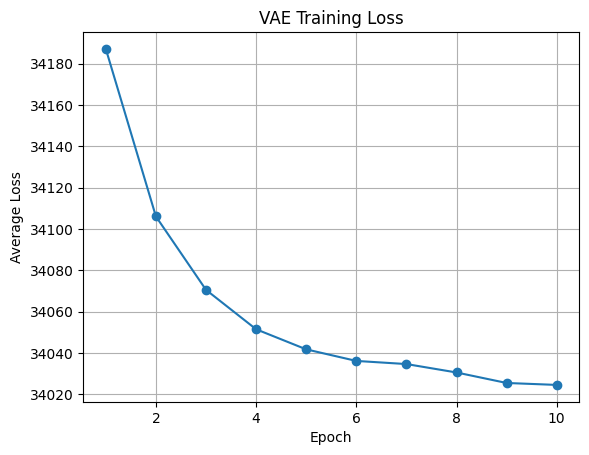

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the Encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2_mean = nn.Linear(hidden_dim, latent_dim)
        self.fc2_logvar = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        h = torch.relu(self.fc1(x))
        mean = self.fc2_mean(h)
        logvar = self.fc2_logvar(h)
        return mean, logvar

# Define the Decoder
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        h = torch.relu(self.fc1(z))
        x_reconstructed = torch.sigmoid(self.fc2(h))  # Output should be between 0 and 1
        return x_reconstructed

# Define the VAE
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, logvar

# Define the loss function
def loss_function(x_reconstructed, x, mu, logvar):
    BCE = nn.BCELoss(reduction='sum')(x_reconstructed, x)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training the VAE with loss plotting
def train_vae(model, dataloader, optimizer, epochs=10):
    model.train()
    losses = []  # List to store the loss for each epoch

    for epoch in range(epochs):
        epoch_loss = 0
        for batch in dataloader:
            data = batch[0]
            optimizer.zero_grad()
            x_reconstructed, mu, logvar = model(data)
            loss = loss_function(x_reconstructed, data, mu, logvar)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Calculate average loss for this epoch
        average_loss = epoch_loss / len(dataloader)
        losses.append(average_loss)
        print(f'Epoch {epoch + 1}, Average Loss: {average_loss:.4f}')

    # Plot the loss over epochs
    plt.plot(range(1, epochs + 1), losses, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.title('VAE Training Loss')
    plt.grid(True)
    plt.show()

# Example usage
input_dim = 784  # For MNIST
hidden_dim = 400
latent_dim = 20

model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Create dummy data for demonstration
data = torch.rand(1000, input_dim)  # Random data in range [0, 1]
dataloader = DataLoader(TensorDataset(data), batch_size=64, shuffle=True)

train_vae(model, dataloader, optimizer, epochs=10)


100%|██████████| 170498071/170498071 [00:03<00:00, 43524154.09it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch 1, Average Loss: 0.0065
Epoch 2, Average Loss: 0.0033
Epoch 3, Average Loss: 0.0030
Epoch 4, Average Loss: 0.0029
Epoch 5, Average Loss: 0.0029
Epoch 6, Average Loss: 0.0028
Epoch 7, Average Loss: 0.0028
Epoch 8, Average Loss: 0.0028
Epoch 9, Average Loss: 0.0027
Epoch 10, Average Loss: 0.0027
Epoch 1, Average Loss: 0.0337
Epoch 2, Average Loss: 0.0120
Epoch 3, Average Loss: 0.0100
Epoch 4, Average Loss: 0.0091
Epoch 5, Average Loss: 0.0086
Epoch 6, Average Loss: 0.0082
Epoch 7, Average Loss: 0.0079
Epoch 8, Average Loss: 0.0077
Epoch 9, Average Loss: 0.0076
Epoch 10, Average Loss: 0.0074


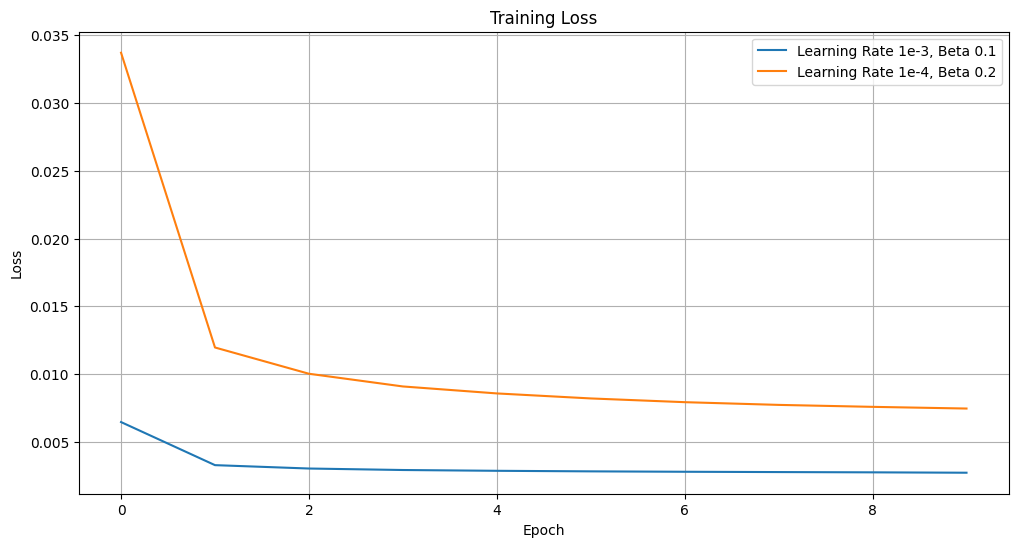

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the UNet-like architecture for the diffusion model
class DiffusionModel(nn.Module):
    def __init__(self):
        super(DiffusionModel, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 3, 3, padding=1)
        )

    def forward(self, x):
        return self.net(x)

# Define the diffusion process
def diffusion_step(x, beta):
    noise = torch.randn_like(x)
    return x + beta * noise

def reverse_diffusion_step(x, model, beta):
    return model(x)

# Training the diffusion model
def train_diffusion_model(model, dataloader, optimizer, num_epochs, beta):
    model.train()
    losses = []

    for epoch in range(num_epochs):
        epoch_loss = 0
        for batch in dataloader:
            images, _ = batch
            noisy_images = diffusion_step(images, beta)

            optimizer.zero_grad()
            denoised_images = reverse_diffusion_step(noisy_images, model, beta)

            loss = nn.MSELoss()(denoised_images, images)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        average_loss = epoch_loss / len(dataloader)
        losses.append(average_loss)
        print(f'Epoch {epoch + 1}, Average Loss: {average_loss:.4f}')

    return losses

# Define a function to plot losses
def plot_losses(losses1, losses2, label1, label2):
    plt.figure(figsize=(12, 6))
    plt.plot(losses1, label=label1)
    plt.plot(losses2, label=label2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example setup for CIFAR-10
def load_data(batch_size):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    return train_loader

# Example hyperparameters
batch_size = 64
num_epochs = 10
beta1 = 0.1
beta2 = 0.2

train_loader = load_data(batch_size)

model1 = DiffusionModel()
optimizer1 = optim.Adam(model1.parameters(), lr=1e-3)
losses1 = train_diffusion_model(model1, train_loader, optimizer1, num_epochs, beta1)

model2 = DiffusionModel()
optimizer2 = optim.Adam(model2.parameters(), lr=1e-4)
losses2 = train_diffusion_model(model2, train_loader, optimizer2, num_epochs, beta2)

plot_losses(losses1, losses2, 'Learning Rate 1e-3, Beta 0.1', 'Learning Rate 1e-4, Beta 0.2')
